In this notebook we will read and display a CT scan of the brain, of the publically available MIDAS database.

In [30]:
import urllib
import SimpleITK as sitk
import tarfile
import os
import matplotlib.pyplot as plt
%matplotlib inline

First, we download the brain scan. This can take a while, the file is about 56MB.

In [6]:
#  Can take a while, the file is about 56MB
if not os.path.exists('PublicBrain001.anonymized.dcm.tgz'):
    publicbrain = urllib.URLopener()
    publicbrain.retrieve('http://www.insight-journal.org/midas/bitstream/view/375', 
                         'PublicBrain001.anonymized.dcm.tgz')

Then we unpack the file, the folder is extracted to `anonymized`.

In [10]:
if not os.path.exists('./anonymized'):
    tar = tarfile.open('PublicBrain001.anonymized.dcm.tgz')
    tar.extractall()
    tar.close()

The collection of files we get are DICOM files, each one of those represents a slice in the final 3D volume. In the examples folder there is a `dicom_wrapper.py` which provides a wrapper to SimpleITK, which we repeat here for convenience.

In [22]:
def read_dicom_series(folder):
    """Read a folder with DICOM files and outputs a SimpleITK image.
    Assumes that there is only one DICOM series in the folder.

    Parameters
    ----------
    folder : string
      Full path to folder with dicom files.

    Returns
    -------
    SimpleITK image.
    """
    reader = sitk.ImageSeriesReader()
    series_ids = reader.GetGDCMSeriesIDs(folder.encode('ascii'))
    #  There are multiple series_ids in the folder, but after experimenting a bit, 
    # we pick the second one, this is [1] below.
    filenames = reader.GetGDCMSeriesFileNames(folder, series_ids[1],
                                              False,  # useSeriesDetails
                                              False,  # recursive
                                              True)  # load sequences
    reader.SetFileNames(filenames)
    image = reader.Execute()

    return image


In [25]:
image = read_dicom_series('./anonymized/')

So, let us see what we have loaded.

In [26]:
image.GetSize()

(512, 512, 91)

An image with an in-plane resolution of 512 x 512 with 91 slices. What about the 'real' spacing? What is the size one pixel, or voxel, represents?


In [27]:
image.GetSpacing()

(0.4199219, 0.4199219, 1.25)

So about 0.42x0.42mm in-plane and a slice thichness of 1.25mm.

To be able to plot the image with `matplotlib`, we convert it to a `numpy` array, for which we can use SimpleITK's `GetArrayFromImage` function.

In [28]:
array = sitk.GetArrayFromImage(image)

Be careful, SimpleITK represents the axis in world-order, where the last axis represents depth, in image-order, this is depth first.

In [29]:
array.shape

(91, 512, 512)

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

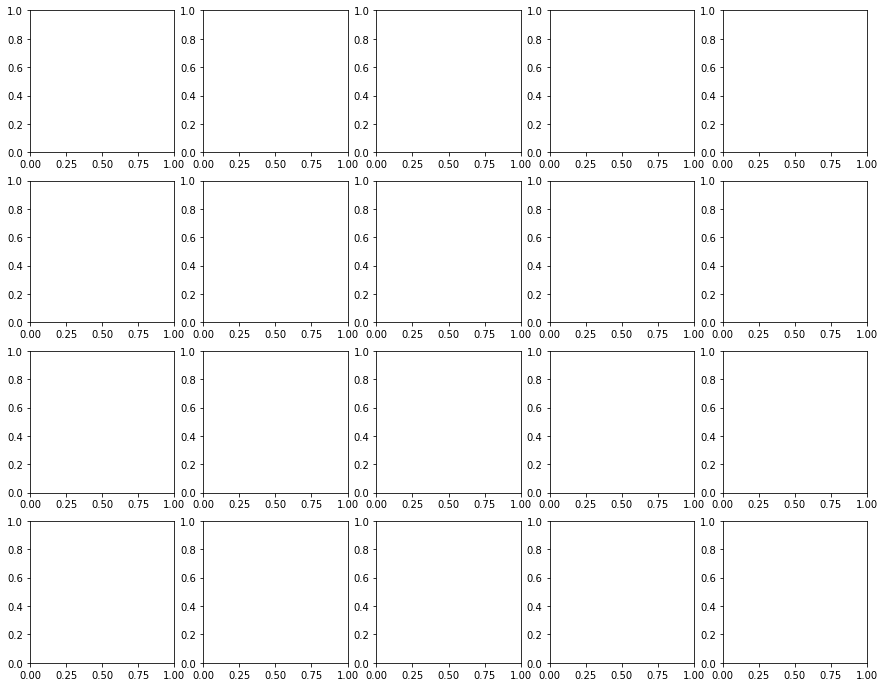

In [41]:
#plt.axis('off')
fig, axs = plt.subplots(4,5, figsize=(15, 12))
axs = axs.ravel()
for i in range(20):
    axs[i].contourf(array[i],cmap='gray')
    axs[i].set_title('slice {}'.format(i))